### Sumário

- Somandos duas variáveis gaussianas 1D
- Multiplando uma variável gaussiana 1D por uma constante
- Somando gaussianas multivariadas
- Multiplicando gaussianas multivariadas por uma matriz
- Conclusão

Neste tópico iremos analisar os efeitos de multiplicar e somar variáveis aleatórias gaussianas.

### Somandos duas variáveis gaussianas 1D

Vamos começar analisando o caso 1D, para isso, supomos duas variáveis aleatória independentes $x_1$ e $x_2$ com pdf $f_1(x)$ e $f_2(x)$.

Neste caso, a pdf de $x_1 + x_2$ é dada por:

$f(x_1+x_2) = f_1(x)*f_2(x)$

Ou seja, a pdf da soma é dada pela convolução das pdf de $f_1(x)$ com $f_2(x)$.

Para o caso de variáveis com pdf gaussianas com $x_1$ ~ $N(\mu_1, \sigma_1)$ e $x_2$ ~ $N(\mu_2, \sigma_2)$ teremos a pdf da soma dada por:

$z = x_1 + x_2$ ~ $N(\mu_1+\mu_2, \sigma_1^2+\sigma_2^2)$

Vamos verificar isso numericamente, para isso teremos duas variáveis $X_1$ e $X_2$ com distribuição normal dada por:

$X_1$ ~ $N(1, 1)$ e $X_2$ ~ $N(2, 2)$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
mu1 = 1
mu2 = 2
mu = np.array([mu1, mu2])
sigma1 = np.sqrt(1)
sigma2 = np.sqrt(2)
cov_m = np.array([[sigma1**2, 0], [0, sigma2**2]])

x1 = np.random.normal(mu1, sigma1, 2000)
x2 = np.random.normal(mu2, sigma2, 2000)

Vamos observar a forma da pdf com usando histogramas.

In [3]:
space = np.linspace(-10, 10, 500)
def gaussian(x, mu, std):
    return np.exp(-0.5*((x-mu)/std)**2)/(std*np.sqrt(2*np.pi))

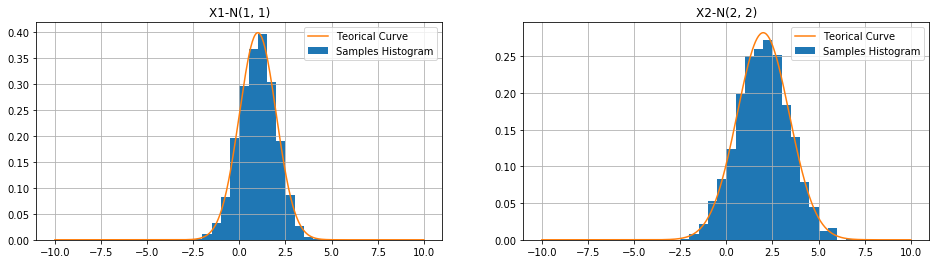

In [4]:
fig, axs = plt.subplots(1, 2, figsize=(16,4))
axs[0].hist(x1, bins=40, range=(-10, 10), density=True)
axs[0].plot(space, gaussian(space, mu1, sigma1))
axs[0].legend(["Teorical Curve", "Samples Histogram"])
axs[0].set_title("X1-N(1, 1)")
axs[0].grid()
axs[1].hist(x2, bins=40, range=(-10, 10), density=True)
axs[1].plot(space, gaussian(space, mu2, sigma2))
axs[1].legend(["Teorical Curve", "Samples Histogram"])
axs[1].set_title("X2-N(2, 2)")
axs[1].grid()

Vamos agora ver a pdf da soma e calcular seus parâmetros

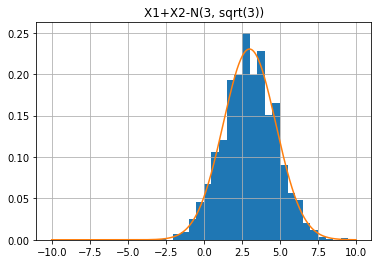

In [5]:
plt.hist(x1+x2, bins=40, range=(-10, 10), density=True)
plt.plot(space, gaussian(space, mu1+mu2, np.sqrt(sigma1**2 + sigma2**2)))
plt.title("X1+X2-N(3, sqrt(3))")
plt.grid()

In [6]:
np.var(x1+x2), np.mean(x1+x2)

(2.9689505056417844, 2.980595732650455)

Podemos ver que a pdf da soma é mais larga como esperado já que a nova variância será dada por $\sigma_1^2 + \sigma_2^2$ = 3 e que a média próxima a $\mu_1$ + $\mu_2$ = 3

### Multiplando uma variável gaussiana 1D por uma constante

Vamos agora ver o que acontece com a pdf de uma v.a. gaussina ao multiplacarmos por uma constante, neste caso, a solução é mais simples e intuitiva do que no caso anteiror, a pdf da nova v.a. é dada por:

$z = ax_1$ ~ $N(a\mu_1, a^2\sigma_1^2)$

Vamos verificar isso numericamente.

In [7]:
np.var(2*x1), np.mean(2*x1)

(3.9406618439363728, 1.9803317867862802)

Com isso, a nova média é igual a $2\mu_1$ ~= $2$ e $2^2\sigma_1^2$ ~= $4$.

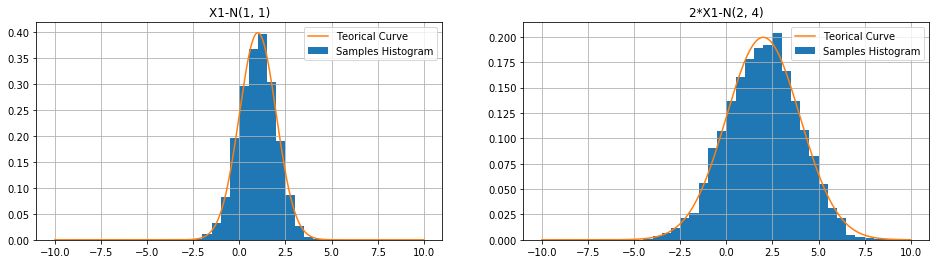

In [8]:
fig, axs = plt.subplots(1, 2, figsize=(16,4))
axs[0].hist(x1, bins=40, range=(-10, 10), density=True)
axs[0].plot(space, gaussian(space, mu1, sigma1))
axs[0].legend(["Teorical Curve", "Samples Histogram"])
axs[0].set_title("X1-N(1, 1)")
axs[0].grid()
axs[1].hist(2*x1, bins=40, range=(-10, 10), density=True)
axs[1].plot(space, gaussian(space, 2*mu1, np.sqrt(2**2*sigma1)))
axs[1].legend(["Teorical Curve", "Samples Histogram"])
axs[1].set_title("2*X1-N(2, 4)")
axs[1].grid()

### Somando gaussianas multivariadas

De forma semelhante ao caso 1D, temos:

$X_1$ ~ $N(\mu_1, \Sigma_1)$ e $X_2$ ~ $N(\mu_2, \Sigma_2)$

A pdf da soma será:

$Z = X_1 + X_2$ ~= $N(\mu_1+\mu_2, \Sigma_1 + \Sigma_2)$

E a multiplacação por uma constante, neste caso se transforma na multiplicação de uma matriz, e o parâmetro do v.a. é dado por:

$Z = AX_1$ ~= $N(A\mu, A^T \Sigma A)$

Vamos ver um exemplo numérico para este caso, para isso vamos assumir a pdf multivariada X com $\mu = [1, 2]$ e $\Sigma = [[1, 0], [0, 2]]$.

In [9]:
X = np.vstack([x1, x2])

In [10]:
X.shape

(2, 2000)

Empiricamente temos a seguinte média de X e matríz de covariância em acordo com esperado.

In [11]:
np.cov(X), np.mean(X,1)

(array([[ 9.85658290e-01, -1.34027691e-03],
        [-1.34027691e-03,  1.98745799e+00]]),
 array([0.99016589, 1.99042984]))

### Multiplicando gaussianas multivariadas por uma matriz

Vamos agora multiplar a v.a. X pela matriz A e comparar o valor empírico com o predito pelas equações.

In [12]:
A = np.array([[2, 1], [1, 0]])

Matriz de convariância e média teórica de AX.

In [13]:
cov = np.array([[1, 0], [0, 2]]); mu = np.array([1, 2])
cov_A = np.dot(np.dot(A.T, cov), A); mu_A = np.dot(A, mu)
cov_A, mu_A

(array([[6, 2],
        [2, 1]]),
 array([4, 1]))

Covariância e média estimada:

In [14]:
np.cov(np.dot(A,X)), np.mean(np.dot(A, X), 1)

(array([[5.92473004, 1.9699763 ],
        [1.9699763 , 0.98565829]]),
 array([3.97076163, 0.99016589]))

Por fim, vamos observar as pdf num gráfico 3D, para facilitar a comparação vamos fazer com que a média de X seja o vetor [0, 0].

In [21]:
cov = np.array([[1, 0], [0, 2]]); mu = np.array([0, 0])
cov_A = np.dot(np.dot(A.T, cov), A); mu_A = np.dot(A, mu)
cov_A, mu_A

(array([[6, 2],
        [2, 1]]),
 array([0, 0]))

In [30]:
x_range = np.linspace(-6, 6, 30)
y_range = np.linspace(-6, 6, 30)

grid_x, grid_y = np.meshgrid(x_range, y_range)

grid_x_f = grid_x.reshape(-1, 1)
grid_y_f = grid_y.reshape(-1, 1)

x_range_a = np.linspace(-6, 6, 30)
y_range_a = np.linspace(-6, 6, 30)

grid_x_a, grid_y_a = np.meshgrid(x_range_a, y_range_a)

grid_x_f_a = grid_x_a.reshape(-1, 1)
grid_y_f_a = grid_y_a.reshape(-1, 1)

In [31]:
def multivariate_normal(x, mu, cov):
    det = np.linalg.det(cov)
    den = np.sqrt(((2*np.pi)**len(cov))*det)
    x_ = x-mu
    cov_inv = np.linalg.inv(cov)
    coef = np.multiply(np.dot(x_, cov_inv), x_)
    coef = np.sum(coef, 1)
    num = np.exp(-0.5*coef)
    return num/den
    

In [32]:
grid = np.hstack([grid_x_f, grid_y_f])
grid_a = np.hstack([grid_x_f_a, grid_y_f_a])

In [33]:
pdf = multivariate_normal(grid, mu, cov_m)
pdf = pdf.reshape(grid_x.shape)
pdf_A = multivariate_normal(grid_a, mu_A, cov_A)
pdf_A = pdf_A.reshape(grid_x_a.shape)

In [34]:
from mpl_toolkits.mplot3d import Axes3D

Text(0.5, 0, 'Y (x2)')

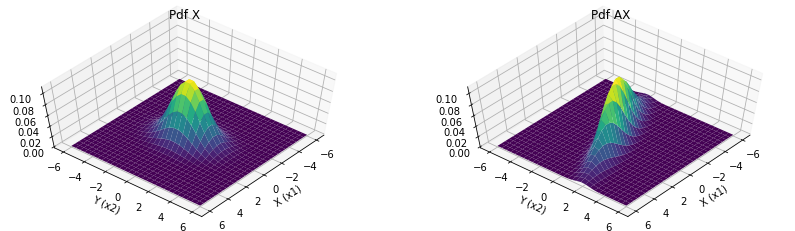

In [40]:
fig = plt.figure(figsize=(14, 4))
ax = fig.add_subplot(121, projection='3d')
ax.plot_surface(grid_x, grid_y, pdf, cmap='viridis')
ax.view_init(elev=60, azim=40)
ax.set_title("Pdf X")
ax.set_xlabel("X (x1)")
ax.set_ylabel("Y (x2)")
ax = fig.add_subplot(122, projection='3d')
ax.plot_surface(grid_x_a, grid_y_a, pdf_A, cmap='viridis')
ax.view_init(elev=60, azim=40)
ax.set_title("Pdf AX")
ax.set_xlabel("X (x1)")
ax.set_ylabel("Y (x2)")

Podemos ver que a agora a pdf tem seu exio mais alongado na direção diagonal em relação aos eixos x e y, isso indica como esperado que agora as variáveis $[x_1, x_2]$ são correlacionadas. Além disso, a variância aumentou, pois todos os elementos não nulos da matriz são >= 1. 

### Conclusão

Neste tópico discutimos:
- O comportamento da soma de duas v.a. aleatórias, particularmente as com pdf gaussianas.
- Como os parâmetros média e variância se alteram ao combinarmos duas v.a. gaussinas.
- Verificamos as equações numericamente e gráficamente.